In [1]:
#https://www.kaggle.com/theblackmamba31/photo-to-sketch-using-autoencoder/notebook
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Input
#from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 

In [2]:
#files uploaded from drive
#https://drive.google.com/drive/folders/1BGstwm14hk4M1BdojqVnsyz8u5iBqU2U?usp=share_link
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

# defining the size of image 
SIZE = 256

image_path = "/content/drive/MyDrive/CUHK_data/CUHK_training_cropped_photos"
img_array = []

sketch_path = '/content/drive/MyDrive/CUHK_data/CUHK_training_cropped_sketches'
sketch_array = []

image_test_path = "/content/drive/MyDrive/CUHK_data/CUHK_testing_cropped_photos"
image_test_array = []

sketch_test_path = "/content/drive/MyDrive/CUHK_data/CUHK_testing_cropped_sketches"
sketch_test_array = []

#Here we convert the images to arrays and store them in list
image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))

In [4]:
#Data augumentation is carried out due to the small amount of samples in the dataset
for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
      
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
      
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
      
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
    #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
    #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))
      

100%|██████████| 88/88 [00:19<00:00,  4.52it/s]


In [5]:
for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    image_test_array.append(img_to_array(image))

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)
      
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
      
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_test_array.append(img_to_array(image))

100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


In [6]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
print(len(img_array[1]))

Total number of sketch images: 704
Total number of images: 704
256


In [7]:
#Slicing and reshaping

#There are 704 train images and 100 test images 
#After slicing the image array, we reshaped them so that images can be fed directly into the encoder network
train_sketch_image = sketch_array[0:]
train_image = img_array[0:]
test_sketch_image = sketch_test_array[0:]
test_image = image_test_array[0:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (704, 256, 256, 3)
Test color image shape (100, 256, 256, 3)


In [ ]:
#Load the model if you dont want to run the process again
#from tensorflow.keras.models import load_model
#model = load_model('/content/drive/MyDrive/CUHK_data/Finalsketch2faceConvAE.h5')

In [8]:
#Downsample layer

def downsample(filters, size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

In [9]:
#Upsample layer

def upsample(filters, size, apply_dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_dropout:
        upsample.add(tf.keras.layers.Dropout(0.1))
    upsample.add(tf.keras.layers.LeakyReLU()) 
    return upsample

In [10]:
#Model

def model():
    encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32,4)(x)
    x = downsample(64,4,False)(x)
    x = downsample(128,4)(x)
    x = downsample(256,4)(x)
   
    encoder_output = downsample(512,4)(x)
    
    decoder_input = upsample(512,4,True)(encoder_output)
    x = upsample(256,4,False)(decoder_input)
    x = upsample(128,4, True)(x)
    x = upsample(64,4)(x)
    x = upsample(32,4)(x)
    x = upsample(16,4)(x)
    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3,(2,2),strides = (1,1), padding = 'valid')(x)
    
  
    return tf.keras.Model(encoder_input, decoder_output)

In [11]:
#summary of model

model = model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 127, 127, 16)      768       
                                                                 
 sequential_1 (Sequential)   (None, 62, 62, 32)        8320      
                                                                 
 sequential_2 (Sequential)   (None, 30, 30, 64)        32768     
                                                                 
 sequential_3 (Sequential)   (None, 14, 14, 128)       131584    
                                                                 
 sequential_4 (Sequential)   (None, 6, 6, 256)         525312    
                                                                 
 sequential_5 (Sequential)   (None, 2, 2, 512)         209920

Epoch 1/150
22/22 [==============================] - 20s 144ms/step - loss: 0.3187 - acc: 0.2777
Epoch 2/150
22/22 [==============================] - 3s 135ms/step - loss: 0.1783 - acc: 0.2491
Epoch 3/150
22/22 [==============================] - 3s 134ms/step - loss: 0.1425 - acc: 0.5953
Epoch 4/150
22/22 [==============================] - 3s 139ms/step - loss: 0.1209 - acc: 0.7572
Epoch 5/150
22/22 [==============================] - 3s 149ms/step - loss: 0.1193 - acc: 0.7844
Epoch 6/150
22/22 [==============================] - 3s 144ms/step - loss: 0.1072 - acc: 0.8027
Epoch 7/150
22/22 [==============================] - 3s 136ms/step - loss: 0.1010 - acc: 0.8174
Epoch 8/150
22/22 [==============================] - 3s 136ms/step - loss: 0.1035 - acc: 0.8232
Epoch 9/150
22/22 [==============================] - 3s 143ms/step - loss: 0.0970 - acc: 0.8327
Epoch 10/150
22/22 [==============================] - 3s 138ms/step - loss: 0.0960 - acc: 0.8328
Epoch 11/150
22/22 [==================

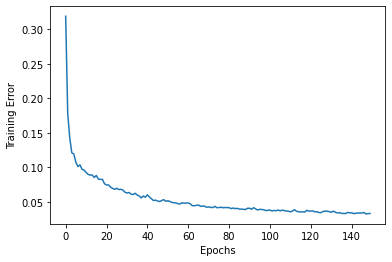

In [12]:
#Model training and results
#sketch2face
#Compiling and Fitting the model
#Adam optimizer is used and binary cross-entropy as loss function and model is trained for 100 epochs

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

hist2 = model.fit(train_sketch_image, train_image, epochs = 100, verbose = 1)

#changing the hyperparameter epochs = 150
#hist2 = model.fit(train_sketch_image, train_image, epochs = 150, verbose = 1)

plt.plot(hist2.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

In [13]:
#sketch2face
import math
#math.nextafter(math.inf,0)
#math.log(_,24)
prediction_on_test_data = model.evaluate(test_sketch_image, test_image)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

4/4 [==============================] - 1s 138ms/step - loss: 0.1103 - acc: 0.8648
Loss:  0.1103050634264946
Accuracy:  86.5


In [ ]:
#sketch2face
def show_images2(sketch, real, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Sketch",fontsize = 15, color = 'Lime')
    plt.imshow(sketch)
    plt.subplot(1,3,2)
    plt.title("Image",fontsize = 15, color = 'Blue')
    plt.imshow(real)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

1/1 [==============================] - 0s 32ms/step


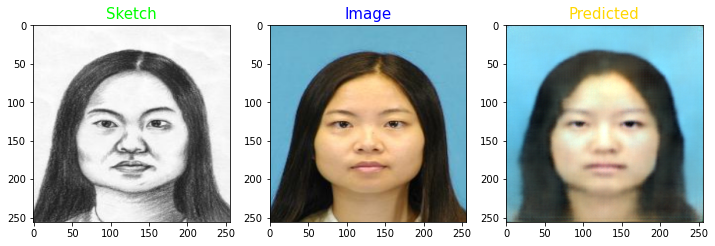

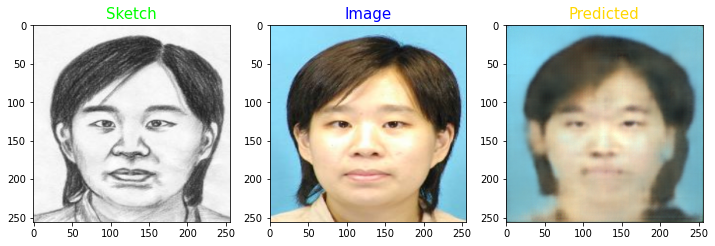

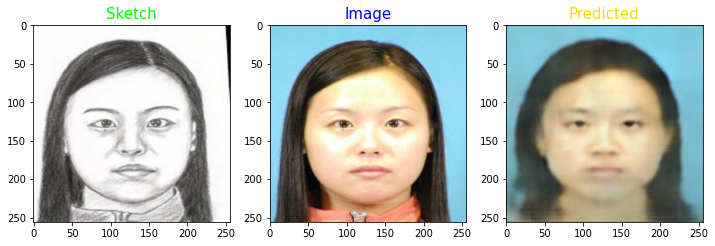

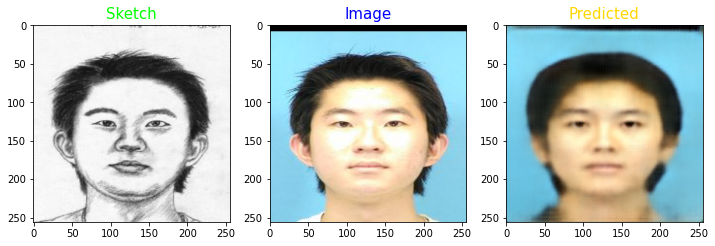

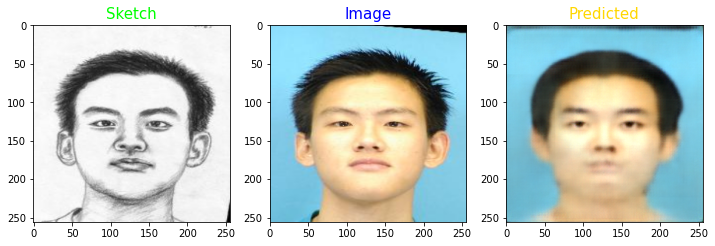

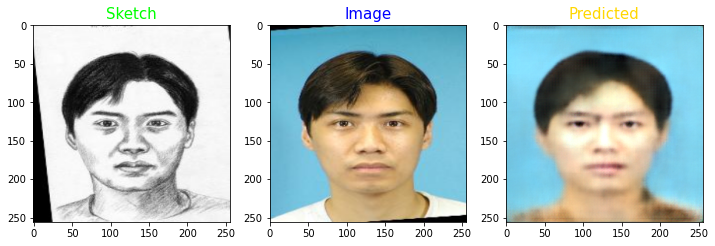

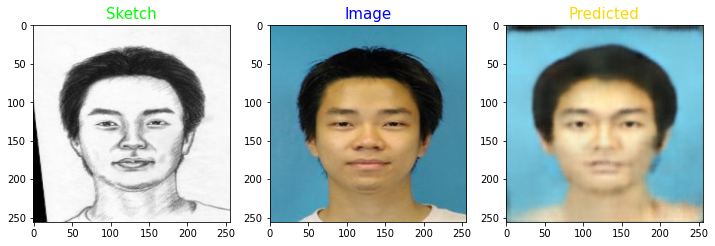

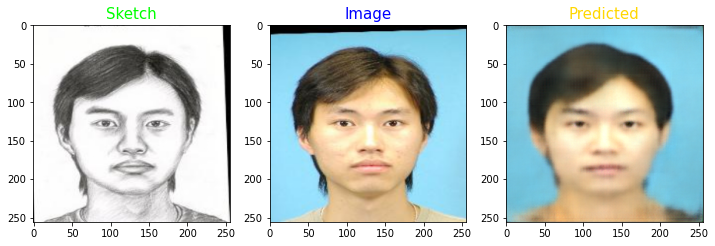

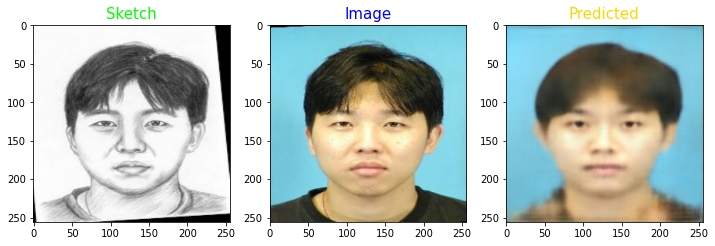

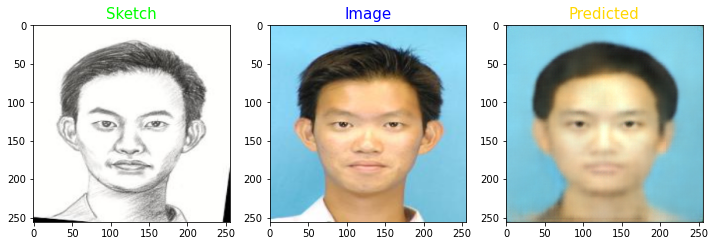

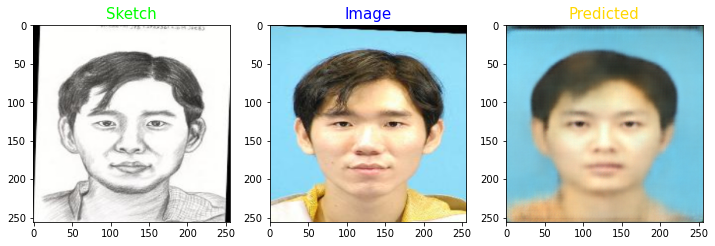

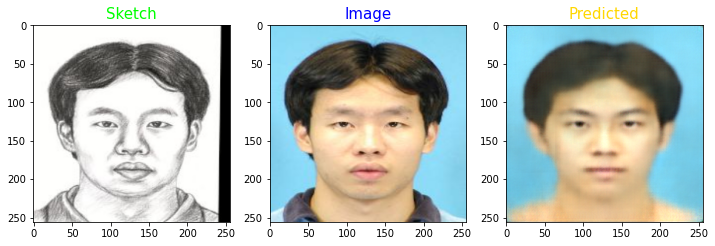

In [ ]:
#sketch2face
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model.predict(test_sketch_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images2(test_sketch_image[i],test_image[i],predicted)

In [ ]:
#sketch2face
pred = []
for i in range(0,99):
  predicted =np.clip(model.predict(test_sketch_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
  pred.append(predicted)

1/1 [==============================] - 0s 26ms/step


In [ ]:
#print(test_image.shape)

(100, 256, 256, 3)


In [ ]:
from skimage.metrics import structural_similarity as ssim1
SSIMarray = []
sumssim = 0
for i in range(0, 99):
  SSIM = ssim1(test_image[i], pred[i], multichannel=True)
  SSIMarray.append(SSIM)
  sumssim+= SSIM

avgssim = sumssim/100
print("SSIM =",round(avgssim,4))

from sklearn.metrics import mean_squared_error as mse1
import math
RMSEarray = []
sumrmse = 0

t = np.reshape(test_image, (100,-1))
p = np.reshape(pred, (99,-1))

for i in range(0, 99):
  MSE = mse1(t[i], p[i])
  RMSEarray.append(math.sqrt(MSE))
  sumrmse+= math.sqrt(MSE)

avgrmse = sumrmse/100
print("RMSE =",round(avgrmse,4))

from sklearn.metrics import median_absolute_error as mae

maearray = []
summae = 0

for i in range(0, 99):
  MAE = mae(t[i], p[i])
  maearray.append(MAE)
  summae+= MAE

avgrmae = summae/100
print("MAE =",round(avgrmae,4))

<ipython-input-20-67c98a5348a1>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  SSIM = ssim1(test_image[i], pred[i], multichannel=True)


SSIM = 0.7738
RMSE = 0.1565
MAE = 0.0834


In [ ]:
#save the model

#sketch2face
model.save("/content/drive/MyDrive/CUHK_data/Finalsketch2faceConvAE.h5")